In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy import stats
import statistics
from math import sqrt
print("ready")

ready


In [2]:
features = pd.read_csv("Bike_train.csv")

In [3]:
features["count"].describe()

count    10932.000000
mean       190.768020
std        181.187809
min          0.000000
25%         41.000000
50%        144.000000
75%        283.000000
max        977.000000
Name: count, dtype: float64

In [4]:
jan = features.loc[features['month'] == 1, 'count'].sum()

In [5]:
feb = features.loc[features['month'] == 2, 'count'].sum()

In [6]:
mar = features.loc[features['month'] == 3, 'count'].sum()

In [7]:
apr = features.loc[features['month'] == 4, 'count'].sum()

In [8]:
may = features.loc[features['month'] == 5, 'count'].sum()

In [9]:
jun = features.loc[features['month'] == 6, 'count'].sum()

In [10]:
jul = features.loc[features['month'] == 7, 'count'].sum()

In [11]:
aug = features.loc[features['month'] == 8, 'count'].sum()

In [12]:
sep = features.loc[features['month'] == 9, 'count'].sum()

In [13]:
octb = features.loc[features['month'] == 10, 'count'].sum()

In [14]:
nov = features.loc[features['month'] == 11, 'count'].sum()

In [15]:
dec = features.loc[features['month'] == 12, 'count'].sum()

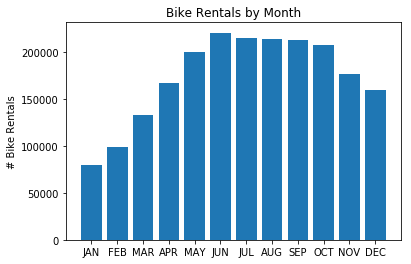

In [16]:
objects = ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL' ,'AUG', 'SEP', 'OCT', 'NOV', 'DEC')
y_pos = np.arange(len(objects))
performance = [79884,99113,133501,167402, 200147, 220733,214617,213516,212529, 207434, 176440, 160160]
 
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('# Bike Rentals')
plt.title('Bike Rentals by Month')
plt.savefig('ts.png')
plt.show()

In [17]:
features.loc[features["atemp"].isnull()]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [18]:
features.loc[features["atemp"] < 1]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
4394,369,2012,1,4,2,1,0,1,1.0,0.82,0.76,34.0,19.0012,1
4395,369,2012,1,4,3,1,0,1,1.0,0.82,0.76,34.0,19.0012,1


In [19]:
features.loc[features["atemp"] == str]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [20]:
features.loc[features["humidity"].isnull()]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [21]:
features.loc[features["humidity"] < 1]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
936,69,2011,3,10,0,1,0,1,3.0,13.94,15.9100,0.0,16.99790,3
937,69,2011,3,10,1,1,0,1,3.0,13.94,15.9100,0.0,16.99790,2
938,69,2011,3,10,2,1,0,1,3.0,13.94,15.9100,0.0,16.99790,1
939,69,2011,3,10,3,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
940,69,2011,3,10,4,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
941,69,2011,3,10,5,1,0,1,3.0,14.76,17.4250,0.0,12.99800,3
942,69,2011,3,10,6,1,0,1,3.0,14.76,16.6650,0.0,22.00280,12
943,69,2011,3,10,7,1,0,1,3.0,15.58,19.6950,0.0,15.00130,37
944,69,2011,3,10,8,1,0,1,3.0,15.58,19.6950,0.0,19.00120,44
945,69,2011,3,10,9,1,0,1,3.0,16.40,20.4550,0.0,15.00130,24


In [22]:
features.loc[features["daylabel"] == 69]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
936,69,2011,3,10,0,1,0,1,3.0,13.94,15.9100,0.0,16.99790,3
937,69,2011,3,10,1,1,0,1,3.0,13.94,15.9100,0.0,16.99790,2
938,69,2011,3,10,2,1,0,1,3.0,13.94,15.9100,0.0,16.99790,1
939,69,2011,3,10,3,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
940,69,2011,3,10,4,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
941,69,2011,3,10,5,1,0,1,3.0,14.76,17.4250,0.0,12.99800,3
942,69,2011,3,10,6,1,0,1,3.0,14.76,16.6650,0.0,22.00280,12
943,69,2011,3,10,7,1,0,1,3.0,15.58,19.6950,0.0,15.00130,37
944,69,2011,3,10,8,1,0,1,3.0,15.58,19.6950,0.0,19.00120,44
945,69,2011,3,10,9,1,0,1,3.0,16.40,20.4550,0.0,15.00130,24


In [23]:
features.loc[features["daylabel"] == 369]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
4392,369,2012,1,4,0,1,0,1,1.0,3.28,3.030,42.0,22.0028,9
4393,369,2012,1,4,1,1,0,1,1.0,1.64,1.515,38.0,19.9995,3
4394,369,2012,1,4,2,1,0,1,1.0,0.82,0.760,34.0,19.0012,1
4395,369,2012,1,4,3,1,0,1,1.0,0.82,0.760,34.0,19.0012,1
4396,369,2012,1,4,4,1,0,1,1.0,0.82,2.275,41.0,12.9980,2
4397,369,2012,1,4,5,1,0,1,1.0,0.82,2.275,41.0,12.9980,14
4398,369,2012,1,4,6,1,0,1,1.0,0.82,2.275,41.0,11.0014,59
4399,369,2012,1,4,7,1,0,1,1.0,0.82,2.275,44.0,12.9980,152
4400,369,2012,1,4,8,1,0,1,1.0,0.82,3.030,44.0,8.9981,315
4401,369,2012,1,4,9,1,0,1,1.0,1.64,3.030,45.0,8.9981,180


In [24]:
features = features.drop([4394, 4395])

In [25]:
features.iloc[4394:4396]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
4396,369,2012,1,4,4,1,0,1,1.0,0.82,2.275,41.0,12.998,2
4397,369,2012,1,4,5,1,0,1,1.0,0.82,2.275,41.0,12.998,14


In [26]:
features.loc[features["humidity"] < 1]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
936,69,2011,3,10,0,1,0,1,3.0,13.94,15.9100,0.0,16.99790,3
937,69,2011,3,10,1,1,0,1,3.0,13.94,15.9100,0.0,16.99790,2
938,69,2011,3,10,2,1,0,1,3.0,13.94,15.9100,0.0,16.99790,1
939,69,2011,3,10,3,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
940,69,2011,3,10,4,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
941,69,2011,3,10,5,1,0,1,3.0,14.76,17.4250,0.0,12.99800,3
942,69,2011,3,10,6,1,0,1,3.0,14.76,16.6650,0.0,22.00280,12
943,69,2011,3,10,7,1,0,1,3.0,15.58,19.6950,0.0,15.00130,37
944,69,2011,3,10,8,1,0,1,3.0,15.58,19.6950,0.0,19.00120,44
945,69,2011,3,10,9,1,0,1,3.0,16.40,20.4550,0.0,15.00130,24


In [27]:
features.loc[features["humidity"] < 1]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
936,69,2011,3,10,0,1,0,1,3.0,13.94,15.9100,0.0,16.99790,3
937,69,2011,3,10,1,1,0,1,3.0,13.94,15.9100,0.0,16.99790,2
938,69,2011,3,10,2,1,0,1,3.0,13.94,15.9100,0.0,16.99790,1
939,69,2011,3,10,3,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
940,69,2011,3,10,4,1,0,1,3.0,14.35,16.6675,0.0,14.99795,0
941,69,2011,3,10,5,1,0,1,3.0,14.76,17.4250,0.0,12.99800,3
942,69,2011,3,10,6,1,0,1,3.0,14.76,16.6650,0.0,22.00280,12
943,69,2011,3,10,7,1,0,1,3.0,15.58,19.6950,0.0,15.00130,37
944,69,2011,3,10,8,1,0,1,3.0,15.58,19.6950,0.0,19.00120,44
945,69,2011,3,10,9,1,0,1,3.0,16.40,20.4550,0.0,15.00130,24


In [28]:
features = features.loc[features["humidity"] != 0.0]

In [29]:
features.loc[features["humidity"] < 1]

,daylabel,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count


In [31]:
bike = pd.read_csv("Bike_test.csv")

In [32]:
labels = np.array(features['count'])

In [33]:
features= features.drop('count', axis = 1)

In [34]:
feature_list = list(features.columns)

In [35]:
features = np.array(features)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [38]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8179, 13)
Training Labels Shape: (8179,)
Testing Features Shape: (2727, 13)
Testing Labels Shape: (2727,)


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [41]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
predictions = rf.predict(test_features)

In [43]:
predictions1 = rf.predict(bike)

In [44]:
predictions1

array([ 14.779,   6.923,   3.356, ..., 172.802, 139.904,  95.176])

In [45]:
e_dataframe = pd.DataFrame(predictions1, columns=["count_pred"]) 

In [46]:
result = pd.concat([bike, e_dataframe], axis=1, join='inner')

In [47]:
count_pred = pd.DataFrame(result['count_pred'])

In [48]:
count_pred.rename(columns={'count_pred': 'count'}, inplace=True)

In [49]:
count_pred.to_csv("/Users/ThomasMatich/Desktop/Kolar/Week4/tmatich.csv")

In [50]:
errors = abs(predictions - test_labels)

In [51]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'count')

Mean Absolute Error: 25.78 count


In [52]:
rf.score(test_features, test_labels)

0.9519752144941435

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
mse=mean_squared_error(test_labels, predictions)
mse

1587.8354054704803

In [55]:
rmse = sqrt(mse)
rmse

39.847652446166514

In [56]:
from sklearn.tree import export_graphviz
import pydot

In [57]:
tree = rf.estimators_[5]

In [58]:
from sklearn.tree import export_graphviz

In [59]:
tree = rf.estimators_[5]

In [60]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [61]:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [62]:
graph.write_png('tree.png')

In [63]:
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: hour                 Importance: 0.6
Variable: daylabel             Importance: 0.18
Variable: workingday           Importance: 0.08
Variable: atemp                Importance: 0.04
Variable: temp                 Importance: 0.03
Variable: humidity             Importance: 0.03
Variable: day                  Importance: 0.01
Variable: weather              Importance: 0.01
Variable: windspeed            Importance: 0.01
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: season               Importance: 0.0
Variable: holiday              Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

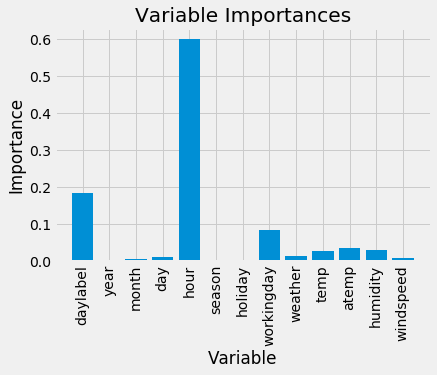

In [64]:
plt.style.use('fivethirtyeight')# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [65]:
jan = result.loc[result['month'] == 1, 'count_pred'].sum()

In [66]:
feb = result.loc[result['month'] == 2, 'count_pred'].sum()

In [67]:
mar = result.loc[result['month'] == 3, 'count_pred'].sum()

In [68]:
apr = result.loc[result['month'] == 4, 'count_pred'].sum()

In [69]:
may = result.loc[result['month'] == 5, 'count_pred'].sum()

In [70]:
jun = result.loc[result['month'] == 6, 'count_pred'].sum()

In [71]:
jul = result.loc[result['month'] == 7, 'count_pred'].sum()

In [72]:
aug = result.loc[result['month'] == 8, 'count_pred'].sum()

In [73]:
sep = result.loc[result['month'] == 9, 'count_pred'].sum()

In [74]:
octb = jan = result.loc[result['month'] == 10, 'count_pred'].sum()

In [75]:
nov = result.loc[result['month'] == 11, 'count_pred'].sum()

In [76]:
dec = result.loc[result['month'] == 12, 'count_pred'].sum()

In [77]:
dec

99296.769

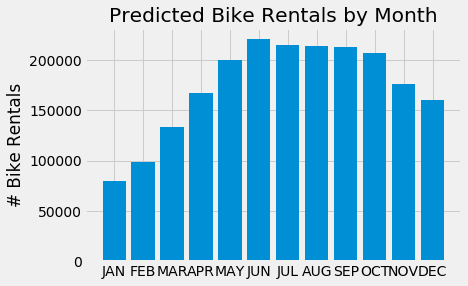

In [78]:
objects = ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL' ,'AUG', 'SEP', 'OCT', 'NOV', 'DEC')
y_pos = np.arange(len(objects))
performance1 = [53117,53042,93174,105296,132834,128057,133360,136119, 123034, 116055, 99889, 99296]
 
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('# Bike Rentals')
plt.title('Predicted Bike Rentals by Month')
plt.savefig('ts.png')
plt.show()

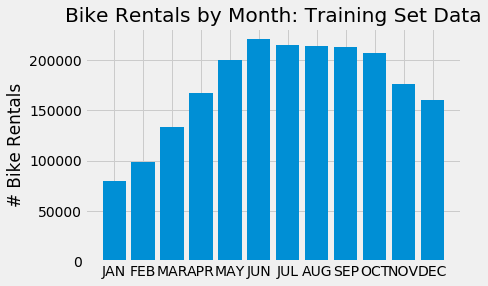

In [79]:
objects = ('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL' ,'AUG', 'SEP', 'OCT', 'NOV', 'DEC')
y_pos = np.arange(len(objects))
performance = [79884,99113,133501,167402, 200147, 220733,214617,213516,212529, 207434, 176440, 160160]
 
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('# Bike Rentals')
plt.title('Bike Rentals by Month: Training Set Data')
plt.savefig('ts.png')
plt.show()

Text(0.5, 1.0, 'Count: Prediction vs Training Data')

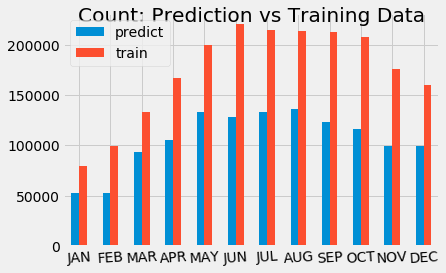

In [82]:
performance1 = [53117,53042,93174,105296,132834,128057,133360,136119, 123034, 116055, 99889, 99296]
performance = [79884,99113,133501,167402, 200147, 220733,214617,213516,212529, 207434, 176440, 160160]

index = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL' ,'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df = pd.DataFrame({'predict': performance1,'train': performance}, index=index)


ax = df.plot.bar(rot=4)
ax.set_title('Count: Prediction vs Training Data',horizontalalignment='center', verticalalignment='top')

In [81]:
result["count_pred"].describe()

count    6493.000000
mean      196.100174
std       173.393911
min         0.583000
25%        55.253000
50%       155.745000
75%       290.040000
max       877.842000
Name: count_pred, dtype: float64